### Vizualize Loss

In [161]:
%matplotlib inline

In [162]:

import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../forward_model/")
import stacklineplot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from generate_samples import generate_readings_from_x_t
from generate_samples import generate_readings_from_s_t
from generate_samples import generate_readings

In [163]:
# dir = "~/server/reonconstructed_eegs/"
# dir = "./reonconstructed_eegs/"
# filename = "convVAE-lr1e-4-N256-C44-L1004-A.npy"
# filename = "convVAE-lr1e-5-N256-C44-L1004-C.npy"
# dir = "/Users/DanielLongo 1/server/VAE/"
dir = "../VAE/"
# filename = "test-5-lower_lr.npy"
# filename = "test-5-batch_norm.npy"
# filename = "StS-test-3.npy"
filename = "StS-test-5.npy"

In [164]:
costs = np.load(dir + filename, allow_pickle=True)

In [165]:
iters = np.arange(costs.shape[0]) * 100

In [166]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

<function matplotlib.pyplot.show(*args, **kw)>

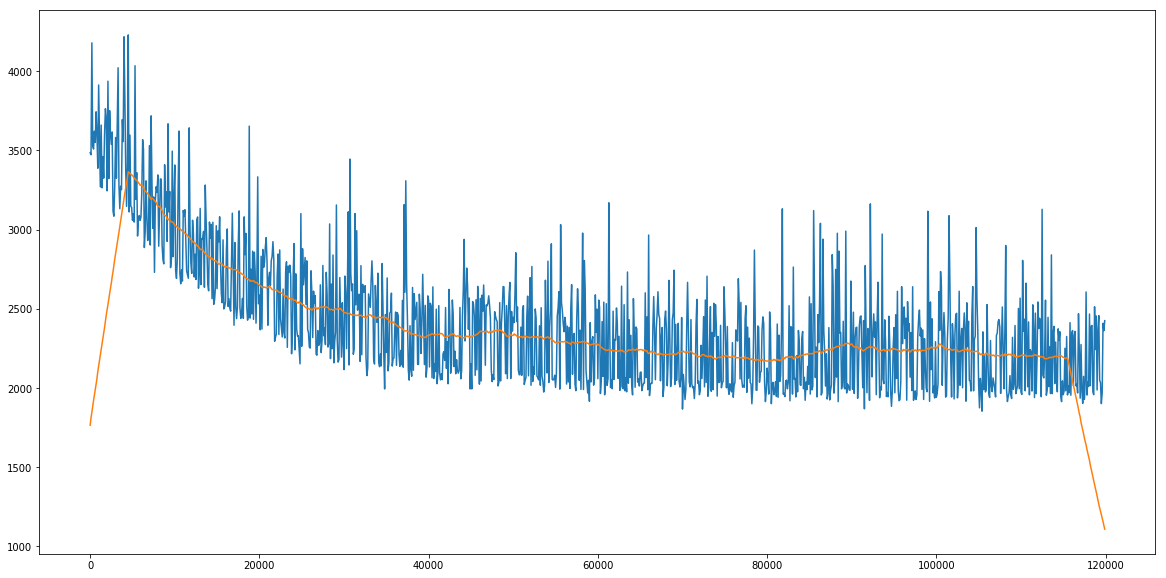

In [167]:
plt.plot(iters, costs)
plt.plot(iters, smooth(costs, 90))#, 'r-')#, lw=2)
plt.show

### Generate Samples

In [139]:
# filename = "VAE-test-5-lower_lr"
# filename= "VAE-test-6-batch_norm"
# filename = "VAE-StS-test-3-BCE"
# filename = "StS-test-5-BIGgrad"
filename = "VAE-StS-test-6-csv" #.pt
num_samples = 4

In [140]:
samples = generate_readings_from_s_t(num_samples, filename, filepath=dir, use_gpu=False)
# samples = generate_readings_from_x_t(num_samples, filename, filepath=dir, use_gpu=False)

In [141]:
samples.shape

(4, 768)

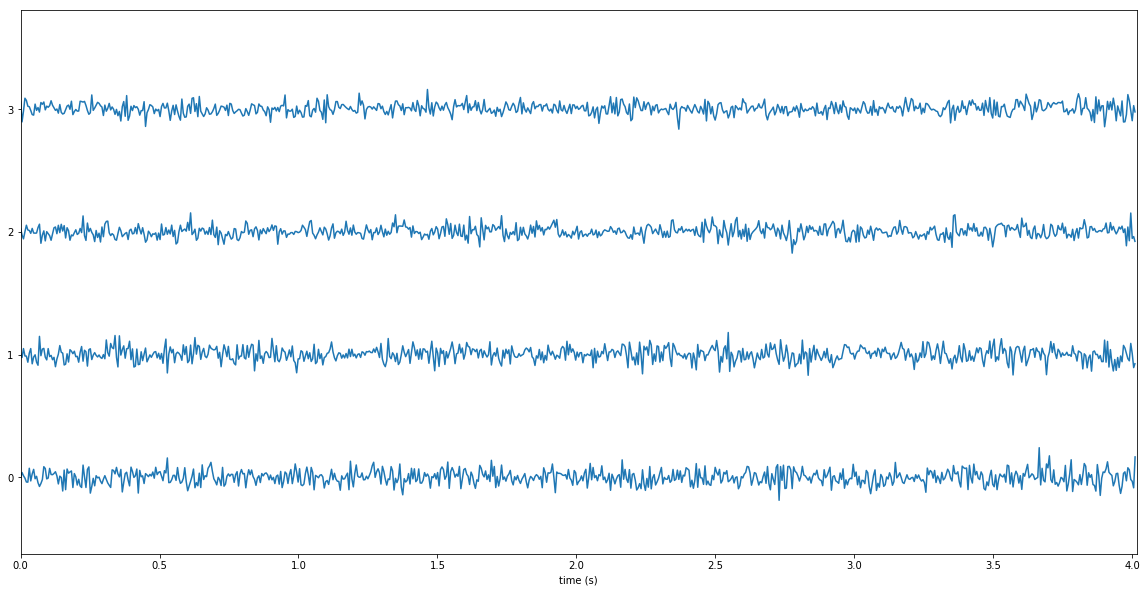

In [142]:
stacklineplot.stackplot(samples, seconds=1004/250, ylabels=[str(i) for i in range(samples.shape[0])], yscale=.3)

### Vizualize Reconstructions

In [143]:
test_num = 6

In [150]:
# filename_generated = prefix + "-generated-" + str(iter) + ".npy" 
# filename_original = prefix + "-orginal-" + str(iter) + ".npy"
samples_dir = "../VAE/samples_sensor_to_sensor/"
samples_dir = "../VAE/samples_sensor_to_sensor/"
filename_recon = "test-" + str(test_num) + "-recon.npy"
filename_original = "test-" + str(test_num) + "-original.npy"

In [151]:
generated = np.squeeze(np.load(samples_dir + filename_recon))[:10, :]
original = np.squeeze(np.load(samples_dir + filename_original))[:10, :]

In [152]:
print("generated", generated.shape)
print("original", original.shape)

generated (10, 768)
original (10, 768)


In [153]:
labels = [str(i) for i in range(generated.shape[0])]

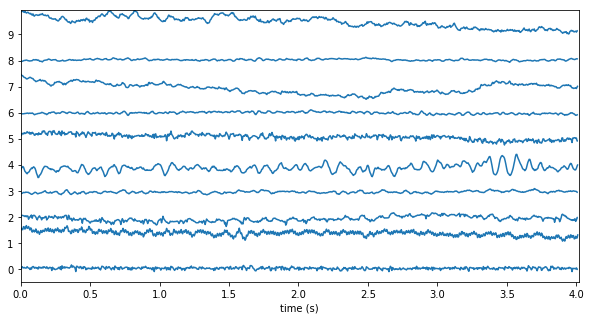

In [154]:
rcParams['figure.figsize'] = 10, 5
stacklineplot.stackplot(original[:,:], seconds=1004/250, ylabels=labels, yscale=1)

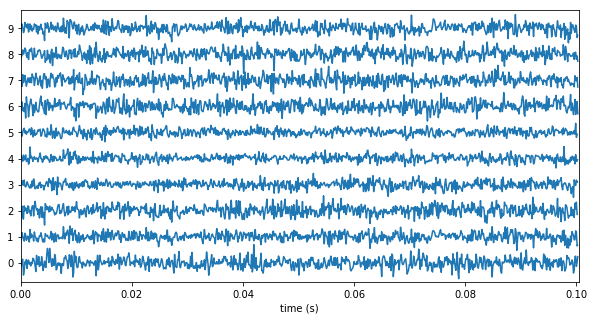

In [155]:
rcParams['figure.figsize'] = 10, 5
stacklineplot.stackplot(generated[:,:], seconds=1004/10000, ylabels=labels, yscale=1)

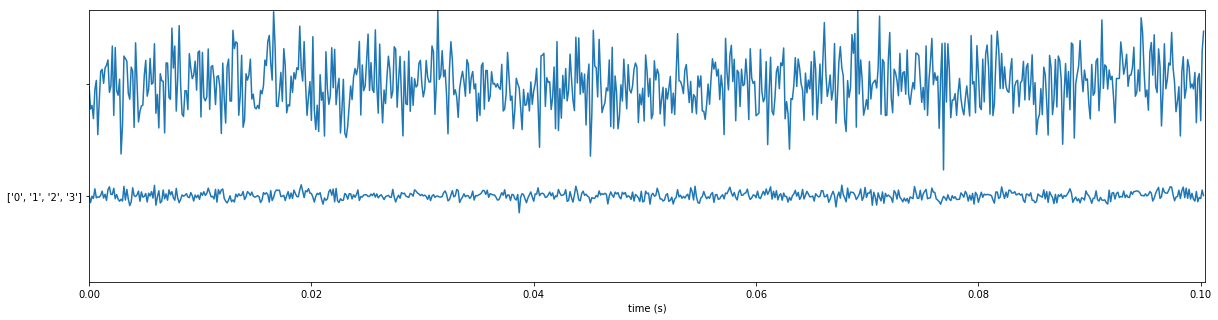

In [38]:
x = np.vstack((generated[0], original[0]))
stacklineplot.stackplot(x, seconds=1004/10000, ylabels=[labels], yscale=1)

In [25]:
i = 2

In [ ]:
# labels = [str(i) for i in range(generated.shape[2])]

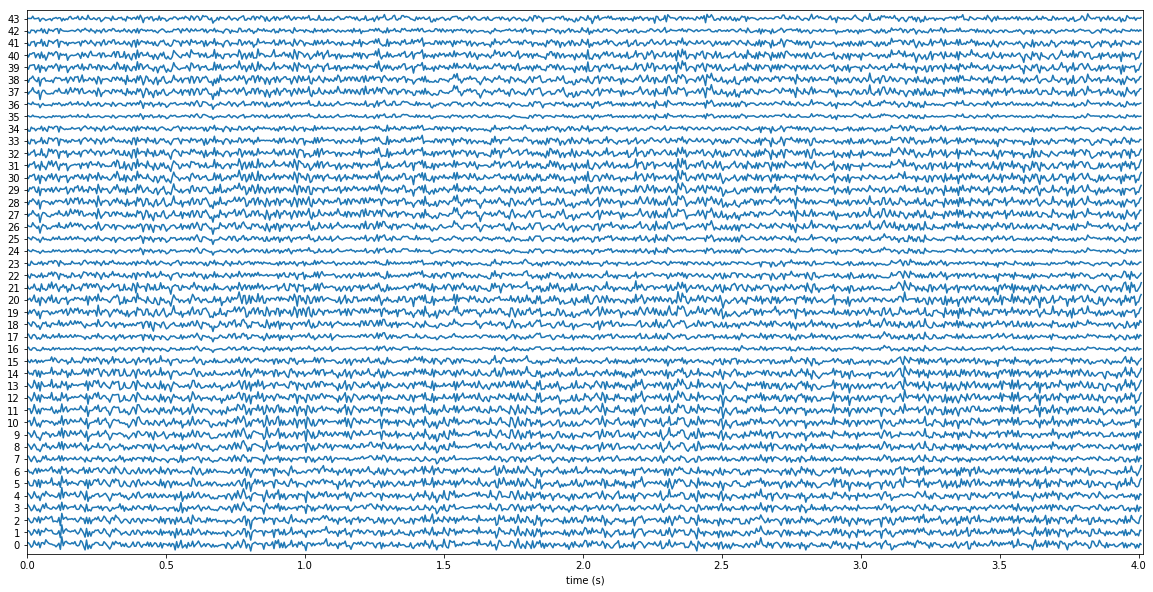

In [26]:
rcParams['figure.figsize'] = 20, 10
stacklineplot.stackplot(original[i], seconds=1004/250, ylabels=labels, yscale=1)
# stacklineplot.stackplot(original.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)

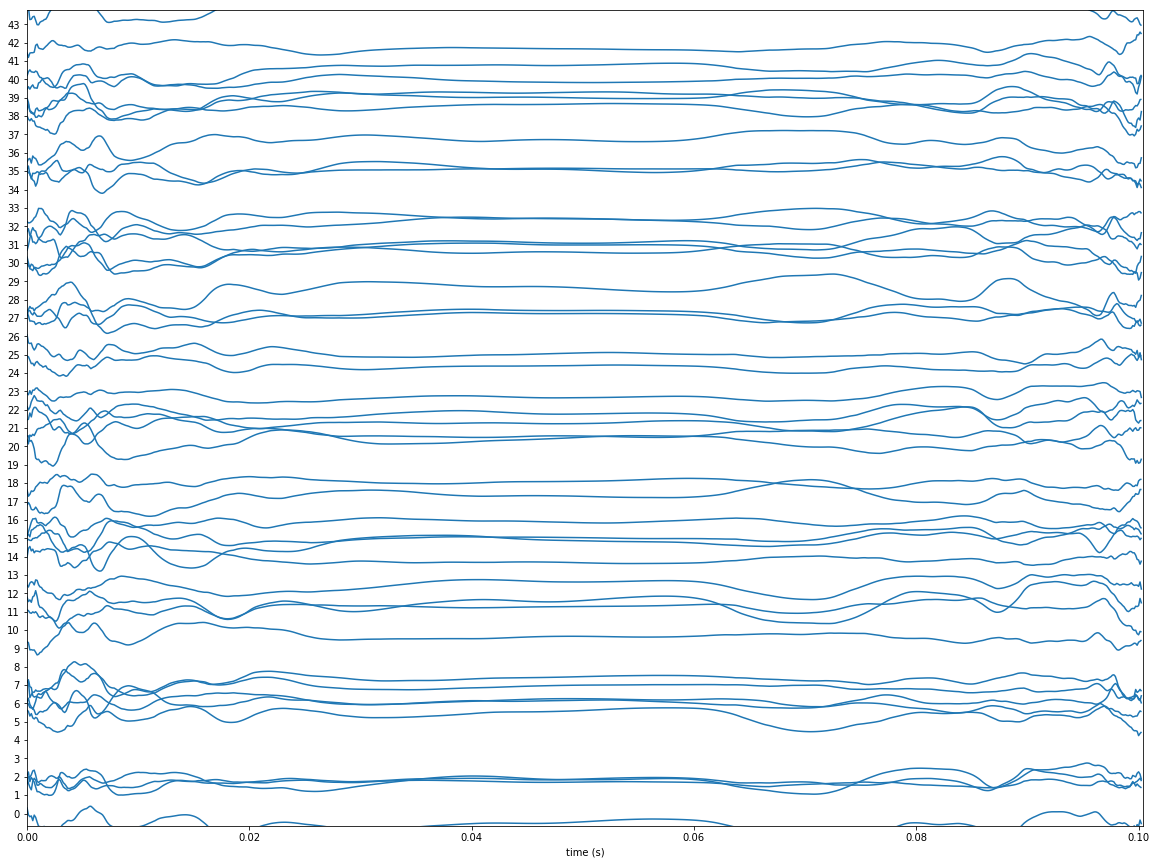

In [27]:
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(generated[i], seconds=1004/10000, ylabels=labels, yscale=1)
# stacklineplot.stackplot(generated.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)